In [1]:
import os
import numpy as np
from skimage import io
from skimage import color
from skimage import filters
import matplotlib.pyplot as plt
%matplotlib inline

## SAR画像読み込み（tif形式）

In [2]:
path_to_fuji_trim_sep = "./mtfuji_sep.png"
path_to_fuji_trim_dec = "./mtfuji_dec.png"

if os.path.exists(path_to_fuji_trim_sep) and os.path.exists(path_to_fuji_trim_dec):
    # ローカルにトリミング済みデータがある場合はそれを読み込んで利用
    img_fuji_sep = io.imread("mtfuji_sep.png").astype(int)
    img_fuji_dec = io.imread("mtfuji_dec.png").astype(int)

else:
    #ない場合はtif形式のSAR画像（1.5GB*2）を読み込み、トリミング
    
    # SAR画像（tif形式）の読み込み
    img_fuji_sep_org = io.imread("IMG-HH-ALOS2233612910-180920-UBSR2.1GUD.tif")
    img_fuji_dec_org = io.imread("IMG-HH-ALOS2246032910-181213-UBSR2.1GUD.tif")

    # 前処理
    # 画像が大きすぎるため、富士山の周辺のみ切り取り
    img_fuji_sep = img_fuji_sep_org[5500:8500,4500:7500,] 
    img_fuji_dec = img_fuji_dec_org[5500:8500,4500:7500,]

    # 0 ~ 255にスケール
    img_fuji_sep = np.clip( (img_fuji_sep) / 80 , 0, 255).astype(int)
    img_fuji_dec = np.clip( (img_fuji_dec) / 80 , 0, 255).astype(int)
    
    # 今後そのまま利用したい場合は一度保存
    # io.imsave("mtfuji_sep.png", img_fuji_sep)
    # io.imsave("mtfuji_dec.png", img_fuji_dec)

## それぞれの期間の基礎情報確認


### 画像確認

/Users/shin/.pyenv/versions/3.6.1/envs/py3.6.1-praha/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


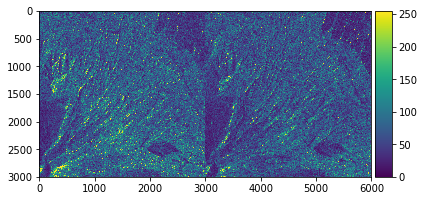

In [3]:
io.imshow(np.hstack((img_fuji_sep, img_fuji_dec)))

左下が山頂。

12月の方が雪の影響で？若干全体的に暗い印象

### 統計情報確認

In [4]:
#9月
print('pixel sum', np.sum(img_fuji_sep))
print('pixel mean', np.mean(img_fuji_sep))
print('pixel variance', np.var(img_fuji_sep))
print('pixel stddev', np.std(img_fuji_sep))

pixel sum 676488563
pixel mean 75.1653958888889
pixel variance 1620.6304267554935
pixel stddev 40.257054372563


In [5]:
#12月
print('pixel sum', np.sum(img_fuji_dec))
print('pixel mean', np.mean(img_fuji_dec))
print('pixel variance', np.var(img_fuji_dec))
print('pixel stddev', np.std(img_fuji_dec))

pixel sum 583237606
pixel mean 64.80417844444445
pixel variance 1200.8358508072681
pixel stddev 34.6530785184703


### ヒストグラムの確認

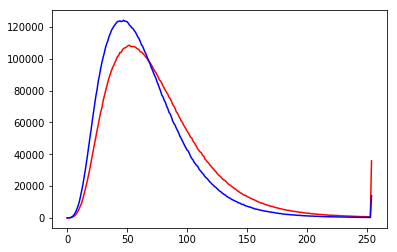

In [6]:
hists_sep, bins=np.histogram(img_fuji_sep, 255, [0, 255])
hists_dec, bins=np.histogram(img_fuji_dec, 255, [0, 255])

plt.plot(hists_sep, color='r')
plt.plot(hists_dec, color='b')

赤が9月で青が12月である。ちょっと形が異なっている。

これが雪のためなのか、その日の天候のためなのかは不明なため、以下で調査。

## 2画像の差分確認

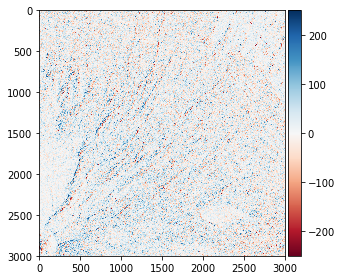

In [7]:
#差分を抽出
img_fuji_diff =  img_fuji_sep - img_fuji_dec
io.imshow(img_fuji_diff)

ノイズが多すぎて何もわからないため、
ぼかしを追加

/Users/shin/.pyenv/versions/3.6.1/envs/py3.6.1-praha/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


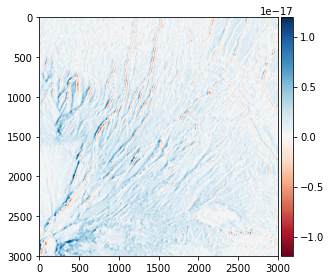

In [8]:
img_fuji_diff_gaus = filters.gaussian(img_fuji_diff, sigma=8)
io.imshow(img_fuji_diff_gaus)

わかりにくいので0 ~ 255にスケール

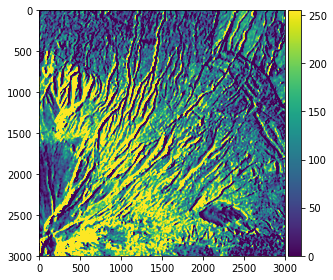

In [9]:
img_fuji_diff_gaus_norm = np.clip( img_fuji_diff_gaus * 10 ** 20 , 0, 255).astype(int)
io.imshow(img_fuji_diff_gaus_norm)

山頂付近よりも、3~5合目あたり（画像中央あたり）の方が夏と冬の画像の変化が激しいことがわかる。
これは雪というよりは植林の変化が原因の可能性も高い。

SARのL-band HH画像だけでは、複数シーズン画像が存在していても、雪のみを判定することは難しいか。